In [18]:
import pandas as pd
#downloadข้อมูลจาก....ตัวเครื่อง
fireTable=pd.read_excel('D:\\4Survey\\Data Science\\Data\\Fire_Data.xlsx')
fireTable

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [19]:
# Plot Graph X = Lat , Y = Lon , Z = Time
#ACQ_Time 635 คือ 6.35 น.
fireTable.ACQ_TIME.unique()
#ต้องการทำ ACQ_Time เป็นชั่วโมง นาที รวมกับ วัน สร้างเป็น Date_Time ใหม่

array([ 635,  636, 1906, 1907,  617,  618, 1847, 1848,  558,  559, 1828,
       1829,  540,  719,  720, 1810, 1950,  700,  701, 1931,  641,  642,
        643, 1913,  623,  624, 1854,  604,  605, 1835, 1836,  545,  546,
        726,  727, 1816, 1956,  707,  708, 1938,  648,  649, 1919,  629,
        630, 1900, 1901,  610,  611, 1841, 1842,  552, 1822, 1823,  533,
        534,  713,  714, 1944,  654,  655, 1925, 1926,  616, 1951, 1932,
       1912, 1853, 1834,  725, 1815, 1957,  551, 1804, 1943,  557,  738,
        539, 1809,  622,  706, 1757, 1937,  647, 1918, 1859,  732, 1803,
       1924,  603,  628, 1840,  731, 1821,  712,  653, 1905, 1949, 2002,
        739, 1817,  733, 2003, 1945, 1855, 1920], dtype=int64)

In [20]:
pd.Timestamp(2012, 5, 1 ,6 ,35 ) ##ใช้ได้ แต่ไม่ใช้

Timestamp('2012-05-01 06:35:00')

In [21]:
fireTable['RealTime'] = fireTable['ACQ_TIME'] #Create new column
fireTable['RealTime'] = (fireTable['RealTime'])/100 #หาร100 ให้หน้า . เป็นชั่วโมง หลังเป็น นาที
fireTable['RealTime'] = fireTable['RealTime'].astype(str) #convert to string
fireTable['RealTime']

0         6.35
1         6.35
2         6.35
3         6.35
4         6.35
         ...  
79229    20.03
79230    20.03
79231    20.03
79232    20.03
79233    20.03
Name: RealTime, Length: 79234, dtype: object

In [22]:
fireTable['RealTime'] = fireTable['RealTime'].str.replace(".", ":") #Replace string . to : for convert to Time frome
fireTable['RealTime']

0         6:35
1         6:35
2         6:35
3         6:35
4         6:35
         ...  
79229    20:03
79230    20:03
79231    20:03
79232    20:03
79233    20:03
Name: RealTime, Length: 79234, dtype: object

In [23]:
fireTable['RealTime'] = pd.to_datetime( fireTable['ACQ_DATE'].astype(str)+' '+fireTable['RealTime'] ) 
#เอา เวลาที่เพิ่งสร้างมาต่อกับวันที่ แล้วแปลงเป็น Type ปี-เดือน-วัน ชั่วโมง:นาที:วินาที  ฟอร์มอื่นไม่ได้ไม่รู้ทำไม
fireTable['RealTime']

0       2019-12-01 06:35:00
1       2019-12-01 06:35:00
2       2019-12-01 06:35:00
3       2019-12-01 06:35:00
4       2019-12-01 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: RealTime, Length: 79234, dtype: datetime64[ns]

In [24]:
fireTable.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
RealTime      datetime64[ns]
dtype: object

In [25]:
fireTable['ACQ_DATE'] = fireTable['ACQ_DATE'].astype(str) #convert to string
fireTable.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE              object
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
RealTime      datetime64[ns]
dtype: object

In [26]:
firedata = fireTable[["LATITUDE","LONGITUDE","RealTime","ACQ_DATE"]]
firedata
#fireTable["RealTime"]

,LATITUDE,LONGITUDE,RealTime,ACQ_DATE
0,16.33696,98.70137,2019-12-01 06:35:00,2019-12-01
1,16.48906,98.73961,2019-12-01 06:35:00,2019-12-01
2,16.93571,99.06874,2019-12-01 06:35:00,2019-12-01
3,16.54092,98.59869,2019-12-01 06:35:00,2019-12-01
4,16.87473,98.63222,2019-12-01 06:35:00,2019-12-01
...,...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00,2020-04-04
79230,17.77545,97.85637,2020-04-04 20:03:00,2020-04-04
79231,17.76847,97.79116,2020-04-04 20:03:00,2020-04-04
79232,17.77518,97.82606,2020-04-04 20:03:00,2020-04-04


In [33]:
fivedays = firedata.loc[(firedata["ACQ_DATE"] == "2020-04-04") | (firedata["ACQ_DATE"] == "2020-04-03") | (firedata["ACQ_DATE"] == "2020-04-01") | (firedata["ACQ_DATE"] == "2020-03-30") | (firedata["ACQ_DATE"] == "2020-03-29")]
fivedays #คัดเลือกมา 5 วัน

,LATITUDE,LONGITUDE,RealTime,ACQ_DATE
66810,15.55817,98.95100,2020-03-29 06:03:00,2020-03-29
66811,15.55754,98.94780,2020-03-29 06:03:00,2020-03-29
66812,15.27939,99.01908,2020-03-29 06:03:00,2020-03-29
66813,15.28391,99.01504,2020-03-29 06:03:00,2020-03-29
66814,15.31204,98.91298,2020-03-29 06:03:00,2020-03-29
...,...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00,2020-04-04
79230,17.77545,97.85637,2020-04-04 20:03:00,2020-04-04
79231,17.76847,97.79116,2020-04-04 20:03:00,2020-04-04
79232,17.77518,97.82606,2020-04-04 20:03:00,2020-04-04


In [38]:
import datetime as dt
import matplotlib.dates as md
fivedays["NumTime"] = fivedays["RealTime"]
fivedays["NumTime"] = md.date2num( fivedays["NumTime"] ) #ทำให้เป็นจำนวนจะได้ Plot ได้
fivedays

<ipython-input-38-b80b19556a04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fivedays["NumTime"] = fivedays["RealTime"]
<ipython-input-38-b80b19556a04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fivedays["NumTime"] = md.date2num( fivedays["NumTime"] )


,LATITUDE,LONGITUDE,RealTime,ACQ_DATE,NumTime
66810,15.55817,98.95100,2020-03-29 06:03:00,2020-03-29,737513.252083
66811,15.55754,98.94780,2020-03-29 06:03:00,2020-03-29,737513.252083
66812,15.27939,99.01908,2020-03-29 06:03:00,2020-03-29,737513.252083
66813,15.28391,99.01504,2020-03-29 06:03:00,2020-03-29,737513.252083
66814,15.31204,98.91298,2020-03-29 06:03:00,2020-03-29,737513.252083
...,...,...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00,2020-04-04,737519.835417
79230,17.77545,97.85637,2020-04-04 20:03:00,2020-04-04,737519.835417
79231,17.76847,97.79116,2020-04-04 20:03:00,2020-04-04,737519.835417
79232,17.77518,97.82606,2020-04-04 20:03:00,2020-04-04,737519.835417


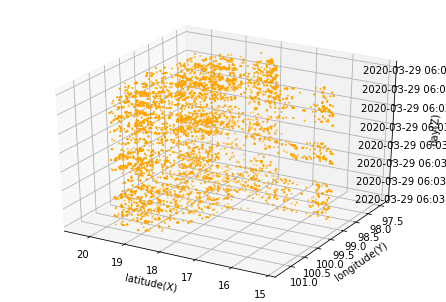

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(fivedays['LATITUDE'], fivedays['LONGITUDE'], fivedays['NumTime'] ,s=1, c='orange', depthshade = True)
ax.view_init(azim=120)
ax.set_xlabel('latitude(X)')
ax.set_ylabel('longitude(Y)')
ax.zaxis.set_ticklabels(fivedays['RealTime']) #ให้ใส่ค่าที่แกน z เป็น วันเดือนปี
ax.set_zlabel('day(Z)')
plt.show()